# Module 2 Summative Lab

## Introduction

For today's section, we're going to work on a single big lab to apply everything we've learned in Module 2!

## About This Lab

A quick note before getting started--this lab isn't like other labs you seen so far. This lab is meant to take ~8 hours to complete, so it's much longer and more challenging than the average labs you've seen so far. If you feel like this lab is challenging or that you might be struggling a bit, don't fret--that's by design! With everything we've learned about Web Scraping, APIs, and Databases, the best way to test our knowledge of it is to build something substantial! 

## The Project

In this lab, we're going to make use of everything we've learned about APIs, databases, and Object-Oriented Programming to **_Extract, Transform, and Load_** (or **_ETL_**, for short) some data from a SQL database into a MongoDB Database. 

You'll find a database containing information about soccer teams and the matches they've played in the file `database.sqlite`. For this project, our goal is to get the data we think is important from this SQL database, do some calculations and data transformation, and then store everything in a MongoDB database. 

Let's get into the specifics of this project.

### The Goal

Start by examining the data dictionary for the SQL database we'll be working with, which comes from this [kaggle page](https://www.kaggle.com/laudanum/footballdelphi).  Familiarize yourself with the tables it contains, and what each column means. We'll be using this database to get data on each soccer team, calculate some summary statistics, and then store each in a MongoDB database. 

Upon completion of this lab, each unique team in this dataset should have a record in the MongoDB instance containing the following information:

* The name of the team
* The total number of goals scored by the team during the 2011 season
* The total number of wins the team earned during the 2011 season
* A histogram visualization of the team's wins and losses for the 2011 season (store the visualization directly by assigning it to a variable)
* The team's win percentage on days where it was raining during games in the 2011 season. 

#### Getting the Weather Data

Note that for this last calculation, you'll need to figure out if it was raining or not during the game. The database itself does not contain this information, but it does contain the date on which the game was played. For this, you'll need to use the [DarkSky API](https://darksky.net/dev) to get the historical weather data for that day. Note that each game is played in a different location, and this information is not contained in our SQL database. However, the teams in this database are largely german, so go ahead and just use the weather in Berlin, Germany as a proxy for this information. If it was raining in Berlin on the day the game was played, count that as rain game--**_you do not need to try and figure out the actual weather at each game's location, because we don't have that information!_**

#### NOTE: The DarkSky API is limited to 1000 free API calls a day, so be sure to test your model on very small samples. Otherwise, you'll hit the rate limit!

## Project Architecture

Unlike previous labs, this lab is more open-ended, and will require you to make design decisions and plan out your strategy for building a system with this many working parts. However, **_using Object-Oriented Programming is a requirement for this project--you must create at least 2 separate, well-structured classes in your solution!_** Although it may seem easier to "just start coding", this is a classic beginner's mistake. Instead, think about separating out the different functionalities you'll need to reach your goal, and then build classes to handle each. For instance, at a minimum, you'll need to:

* Query the SQL database
* Calculate summary statistics
* Get the weather data from the DarkSky API
* Load the data into MongoDB

We **_strongly recommend_** you consider creating separate classes for handling at least some of these tasks.  Be sure to plan the inputs, outputs, and methods for each class before you begin coding! 

**_NOTE:_** We have provided some empty classes below. You are welcome to delete them and use a different architecture for this project if you so choose.  You do not have to use each of them, they are just there to give you an idea of what sorts of classes you may want to consider using.

### Rapid Prototyping and Refactoring

It's totally okay to try to get a task working without using OOP. For instance, when experimenting with the DarkSky API for getting historical weather data, it makes sense to just write the code in the cells and rapidly iterate until you get it all working. However, once you get it working, you're not done--you should then **_Refactor_** your code into functions or classes to make your code more modular, reusable, understandable, and maintainable! 

In short--do what you need to do to get each separate piece of functionality working, and then refactor it into a class after you've figured it out!

### Some Final Advice

You haven't built anything this big or complex thus far, so you may not yet fully realize how much trial and error goes into it. If your code keeps breaking, resist the urge to get frustrated, and just keep working. Software development is an iterative process!  No one writes perfect code that works the first time for something this involved. You're going to run into _a lot_ of small errors in this project, right up until the point where it just works, and then you're done! However, you can reduce these errors by planning out your code, and thinking about how all of the pieces fit together before you begin coding. Once you have some basic understanding of how it all will work, then you'll know what you need to build, and then all that is left is to build it!

In short:

* Plan ahead--you'll thank yourself later!
* Errors and broken code aren't bad, they're normal. 
* Keep working, and stay confident--you can do this!

Good luck--we look forward to seeing your completed project!

# PROJECT PLAN

### **The Goal**: _to get the data we think is important from this SQL database, do some calculations and data transformation, and then store everything in a MongoDB database._

### Project Requirements:
- [ ] **Query the SQL Database**
    - figure out the tables schema
    - describe each column - name, type of data, etc.
    - extract the name of each team, number of goals scored AND wins during 2011 season
    - visualizations - histogram of each team's wins and losses in 2011 season (_stored by directly assigning it to a variable_)
- [ ] **Calculate Summary Stats**
    - `total_goals_2011`
    - `total_wins_2011`
    - `total_losses_2011`
- [ ] **Obtain weather data from DarkSky API**
    - [ ] **Load the data into MongoDB**
    - `wins_rainy_2011`: team's win percentage on days where it was raining during games in 2011
        - _boolean var for whether or not it was raining during the game_ use date of game, weather from DarkSky, and assume game location in Berlin.
        - `raining` : 1=Yes, 0=No
- [ ] **Create multiple classes (OOP)**

#### Upon completion of this lab, each unique team in this dataset should have a record in the MongoDB instance containing the following information:

- [ ] The name of the team
- [ ] The total number of goals scored by the team during the 2011 season
- [ ] The total number of wins the team earned during the 2011 season
- [ ] A histogram visualization of the team's wins and losses for the 2011 season (store the visualization directly by assigning it to a variable)
- [ ] The team's win percentage on days where it was raining during games in the 2011 season.

# Initial Data Exploration
We will begin by importing the SQL database and doing some initial exploration to understand the variables and data provided.

### Database Information
_credit:_ [https://www.kaggle.com/laudanum/footballdelphi#]

#### Table: Matches

- `Match_ID` (int): unique ID per match
- `Div` (str): identifies the division the match was played in (D1 = Bundesliga, D2 = Bundesliga 2, E0 = English Premier League)
- `Season` (int): Season the match took place in (usually covering the period of August till May of the following year)
- `Date` (str): Date of the match
- `HomeTeam` (str): Name of the home team
- `AwayTeam` (str): Name of the away team
- `FTHG` (int) (Full Time Home Goals): Number of goals scored by the home team
- `FTAG` (int) (Full Time Away Goals): Number of goals scored by the away team
- `FTR` (str) (Full Time Result): 3-way result of the match (H = Home Win, D = Draw, A = Away Win)

#### Table: Teams

- `Season` (str): Football season for which the data is valid
- `TeamName` (str): Name of the team the data concerns
- `KaderHome` (str): Number of Players in the squad
- `AvgAgeHome` (str): Average age of players
- `ForeignPlayersHome` (str): Number of foreign players (non-German, non-English respectively) playing for the team
- `OverallMarketValueHome` (str): Overall market value of the team pre-season in EUR (based on data from transfermarkt.de)
- `AvgMarketValueHome` (str): Average market value (per player) of the team pre-season in EUR (based on data from transfermarkt.de)
- `StadiumCapacity` (str): Maximum stadium capacity of the team's home stadium

#### Table: Unique Teams

- `TeamName` (str): Name of a team
- `Unique_Team_ID` (int): Unique identifier for each team

#### Table: Teams_in_Matches

- `Match_ID` (int): Unique match ID
- `Unique_Team_ID` (int): Unique team ID (This table is used to easily retrieve each match a given team has played in)

**Based on these tables I created a couple of views which I used as input for my machine learning models:**
#### View: FlatView

Combination of all matches with the respective additional data from Teams table for both home and away team.

#### View: FlatView_Advanced

Same as Flatview but also includes Unique_Team_ID and Unique_Team in order to easily retrieve all matches played by a team in chronological order.

#### View: FlatView_Chrono_TeamOrder_Reduced

Similar to Flatview_Advanced, however missing the additional attributes from team in order to have a longer history including years 1993 - 2004. Especially interesting if one is only interested in analyzing winning/loosing streaks.

### Initial SQL Queries

In [1]:
import sqlite3
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [3]:
conn = sqlite3.Connection('database.sqlite')
c = conn.cursor()

In [4]:
# to see what tables are provided in the database
c.execute("""SELECT *FROM sqlite_master;""")
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,1023,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Matches,Matches,810,"CREATE TABLE ""Matches"" (\n\t`Match_ID`\tINTEGE..."
2,index,sqlite_autoindex_Matches_1,Matches,1502,None
3,table,Teams_in_Matches,Teams_in_Matches,4,CREATE TABLE Teams_in_Matches(\n Match_ID INT...
4,table,Teams,Teams,5,"CREATE TABLE ""Teams"" (\n\t`Season`\tTEXT,\n\t`..."
5,table,Unique_Teams,Unique_Teams,7,"CREATE TABLE ""Unique_Teams"" (\n\t`TeamName`\tT..."
6,view,FlatView_Chrono_TeamOrder_Reduced,FlatView_Chrono_TeamOrder_Reduced,0,CREATE VIEW FlatView_Chrono_TeamOrder_Reduced\...
7,view,FlatView_Advanced,FlatView_Advanced,0,CREATE VIEW FlatView_Advanced AS SELECT Match_...
8,view,FlatView,FlatView,0,CREATE VIEW FlatView AS Select Matches.Match_I...


In [5]:
print(len(df))

9


In [6]:
# to quickly view what primary and foreign keys we have to act as an intermediary between matches and teams
c.execute("""SELECT * FROM teams_in_matches;""")
teams_in_matches_df = pd.DataFrame(c.fetchall())
teams_in_matches_df.columns = [x[0] for x in c.description]
teams_in_matches_df.head()

,Match_ID,Unique_Team_ID
0,1,26
1,1,46
2,2,26
3,2,42
4,3,26


#### Matches and Teams tables

First let's take a quick glance at the Teams table for the 2011 season only.

In [7]:
c.execute("""SELECT * FROM teams WHERE season = 2011;""")
teams2011_df = pd.DataFrame(c.fetchall())
teams2011_df.columns = [x[0] for x in c.description]
teams2011_df.head()

,Season,TeamName,KaderHome,AvgAgeHome,ForeignPlayersHome,OverallMarketValueHome,AvgMarketValueHome,StadiumCapacity
0,2011,Bayern Munich,24,25,11,335600000,13980000,75000
1,2011,Dortmund,28,24,12,158200000,5650000,81359
2,2011,Leverkusen,29,23,9,151100000,5210000,30210
3,2011,Schalke 04,37,24,20,136730000,3700000,62271
4,2011,Werder Bremen,38,23,17,125350000,3300000,42100


In [8]:
print(teams2011_df.shape)

(36, 8)


In [9]:
teams2011_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 8 columns):
Season                    36 non-null object
TeamName                  36 non-null object
KaderHome                 36 non-null object
AvgAgeHome                36 non-null object
ForeignPlayersHome        36 non-null object
OverallMarketValueHome    36 non-null object
AvgMarketValueHome        36 non-null object
StadiumCapacity           36 non-null object
dtypes: object(8)
memory usage: 2.4+ KB


In [10]:
teams2011_df.TeamName.describe()

count                36
unique               36
top       Werder Bremen
freq                  1
Name: TeamName, dtype: object

In [11]:
teams2011_df.TeamName

0          Bayern Munich
1               Dortmund
2             Leverkusen
3             Schalke 04
4          Werder Bremen
5              Wolfsburg
6                Hamburg
7              Stuttgart
8             Hoffenheim
9                FC Koln
10              Hannover
11            M'gladbach
12              Freiburg
13                 Mainz
14                Hertha
15        Kaiserslautern
16              Nurnberg
17              Augsburg
18         Ein Frankfurt
19              St Pauli
20               Cottbus
21                Bochum
22    Fortuna Dusseldorf
23        Greuther Furth
24           Munich 1860
25                Aachen
26            Ingolstadt
27              Duisburg
28             Karlsruhe
29               Dresden
30         Frankfurt FSV
31        Erzgebirge Aue
32         Hansa Rostock
33          Union Berlin
34             Paderborn
35          Braunschweig
Name: TeamName, dtype: object

We have 36 teams represented as having played in the 2011 season according to the teams table.

Now let's first look at the matches table, selecting only the 2011 season.

In [12]:
c.execute("""SELECT * FROM matches WHERE season = 2011;""")
matches2011_df = pd.DataFrame(c.fetchall())
matches2011_df.columns = [x[0] for x in c.description]
matches2011_df.head()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D


In [13]:
print(matches2011_df.shape)

(992, 9)


In [14]:
matches2011_df.columns

Index(['Match_ID', 'Div', 'Season', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG',
       'FTAG', 'FTR'],
      dtype='object')

In [15]:
matches2011_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 9 columns):
Match_ID    992 non-null int64
Div         992 non-null object
Season      992 non-null int64
Date        992 non-null object
HomeTeam    992 non-null object
AwayTeam    992 non-null object
FTHG        992 non-null int64
FTAG        992 non-null int64
FTR         992 non-null object
dtypes: int64(4), object(5)
memory usage: 69.9+ KB


In [16]:
matches2011_df.HomeTeam.value_counts()

Chelsea               19
West Brom             19
Swansea               19
Tottenham             19
Wolves                19
Liverpool             19
Norwich               19
Sunderland            19
Fulham                19
QPR                   19
Man United            19
Bolton                19
Man City              19
Everton               19
Blackburn             19
Aston Villa           19
Stoke                 19
Wigan                 19
Newcastle             19
Arsenal               19
Hannover              17
Schalke 04            17
Hoffenheim            17
Dortmund              17
Bayern Munich         17
Ingolstadt            17
FC Koln               17
Munich 1860           17
Kaiserslautern        17
Aachen                17
Hertha                17
Stuttgart             17
Duisburg              17
Nurnberg              17
Cottbus               17
Erzgebirge Aue        17
Augsburg              17
Braunschweig          17
Frankfurt FSV         17
Hamburg               17


In [17]:
matches2011_df.AwayTeam.describe()

count         992
unique         56
top       Chelsea
freq           19
Name: AwayTeam, dtype: object

In [18]:
matches2011_df.HomeTeam.describe()

count         992
unique         56
top       Chelsea
freq           19
Name: HomeTeam, dtype: object

It appears that there is a discrepancy in the number of unique teams between the matches and teams tables (both for 2011 season only). The teams table has 36 unique teams while the matches table has 56 unique teams - both for home and away teams. It's possible that the teams table is not as complete and is missing data for 20 teams. Given this, we will **use the matches table when creating a unique list of teams for our models.**

In [19]:
# for reference, checking the unique teams table to see number of teams (without distinction of season)
c.execute("""SELECT * FROM unique_teams;""")
unique_teams_df = pd.DataFrame(c.fetchall())
unique_teams_df.columns = [x[0] for x in c.description]
print(unique_teams_df.shape)
print(unique_teams_df.TeamName.describe())
unique_teams_df.head()

(128, 2)
count            128
unique           128
top       Babelsberg
freq               1
Name: TeamName, dtype: object


,TeamName,Unique_Team_ID
0,Bayern Munich,1
1,Dortmund,2
2,Leverkusen,3
3,RB Leipzig,4
4,Schalke 04,5


#### teams that are not represented in the `teams` table

In [20]:
outer_merge = pd.merge(matches2011_df, teams2011_df, left_on='HomeTeam', right_on='TeamName' , how="outer", indicator=True)
outer_merge.head()

,Match_ID,Div,Season_x,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Season_y,TeamName,KaderHome,AvgAgeHome,ForeignPlayersHome,OverallMarketValueHome,AvgMarketValueHome,StadiumCapacity,_merge
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A,2011,Nurnberg,30,23,12,43180000,1440000,50000,both
1,1112,D1,2011,2012-02-03,Nurnberg,Dortmund,0,2,A,2011,Nurnberg,30,23,12,43180000,1440000,50000,both
2,1185,D1,2011,2012-02-18,Nurnberg,FC Koln,2,1,H,2011,Nurnberg,30,23,12,43180000,1440000,50000,both
3,1210,D1,2011,2011-11-05,Nurnberg,Freiburg,1,2,A,2011,Nurnberg,30,23,12,43180000,1440000,50000,both
4,1217,D1,2011,2012-04-21,Nurnberg,Hamburg,1,1,D,2011,Nurnberg,30,23,12,43180000,1440000,50000,both


In [21]:
# because we used an outer merge we should have NaN values for the TeamName 
# column where there are no matching values to HomeTam
outer_merge.TeamName = outer_merge.TeamName.fillna('Missing')
print(len(outer_merge.loc[outer_merge['TeamName'] == 'Missing', 'HomeTeam']))

380


In [22]:
# The 20 unaccounted for teams between the matches and the teams tables for season=2011
print(len(outer_merge.loc[outer_merge['TeamName'] == 'Missing', 'HomeTeam'].unique()))
missing_teams = outer_merge.loc[outer_merge['TeamName'] == 'Missing', 'HomeTeam'].unique()
missing_teams

20


array(['Blackburn', 'Fulham', 'Liverpool', 'Newcastle', 'QPR', 'Wigan',
       'Stoke', 'West Brom', 'Man City', 'Arsenal', 'Aston Villa',
       'Chelsea', 'Everton', 'Sunderland', 'Swansea', 'Bolton', 'Norwich',
       'Wolves', 'Man United', 'Tottenham'], dtype=object)

In [23]:
missing_teams.tolist()

['Blackburn',
 'Fulham',
 'Liverpool',
 'Newcastle',
 'QPR',
 'Wigan',
 'Stoke',
 'West Brom',
 'Man City',
 'Arsenal',
 'Aston Villa',
 'Chelsea',
 'Everton',
 'Sunderland',
 'Swansea',
 'Bolton',
 'Norwich',
 'Wolves',
 'Man United',
 'Tottenham']

In [24]:
teams_teams = teams2011_df['TeamName']
print(type(teams_teams))

<class 'pandas.core.series.Series'>


In [25]:
teams_matches = matches2011_df['HomeTeam']

In [26]:
# Just to confirm that these teams are in fact missing from the teams2011 dataframe
for team in teams_teams:
    if team in missing_teams:
        print(team)

In [27]:
for team in teams_matches:
    if team in missing_teams:
        print(team)

Blackburn
Fulham
Liverpool
Newcastle
QPR
Wigan
Stoke
West Brom
Man City
Arsenal
Aston Villa
Chelsea
Everton
Sunderland
Swansea
Bolton
Norwich
Wolves
Man United
Aston Villa
Blackburn
Chelsea
Liverpool
Swansea
Wigan
Man United
Newcastle
Tottenham
West Brom
Arsenal
Bolton
Everton
Man City
Stoke
Sunderland
Wolves
Fulham
Norwich
QPR
Aston Villa
Blackburn
Bolton
Everton
Swansea
Wolves
Fulham
Man United
Sunderland
Tottenham
Arsenal
Chelsea
Liverpool
Man City
Newcastle
Stoke
West Brom
Wigan
QPR
Norwich
Aston Villa
Blackburn
Everton
Man United
Sunderland
Wolves
Bolton
Fulham
Swansea
Tottenham
Chelsea
Liverpool
Man City
Norwich
QPR
Stoke
Wigan
Arsenal
Newcastle
West Brom
Aston Villa
Bolton
Liverpool
Newcastle
Wolves
Arsenal
Blackburn
Fulham
Man United
QPR
Chelsea
Everton
Man City
Norwich
Sunderland
Swansea
West Brom
Wigan
Tottenham
Stoke
Arsenal
Aston Villa
Blackburn
Liverpool
Man United
Newcastle
QPR
Bolton
Fulham
Wolves
Everton
Man City
Norwich
Stoke
Sunderland
Swansea
West Brom
Wigan
Chelsea


# Team Stats - SQL Queries and Pandas

In [28]:
# extracting wins and goals for those games for hometeams in 2011 season
c.execute("""SELECT DISTINCT(hometeam), COUNT(ftr) as home_wins, SUM(fthg)   
                    FROM matches WHERE season = 2011 AND ftr = 'H' 
                    GROUP BY 1 ORDER BY 1;""")
home_w_g = pd.DataFrame(c.fetchall())
home_w_g.columns = [x[0] for x in c.description]
print(home_w_g.shape)
home_w_g.head()

(56, 3)


,HomeTeam,home_wins,SUM(fthg)
0,Aachen,4,8
1,Arsenal,12,32
2,Aston Villa,4,9
3,Augsburg,6,11
4,Bayern Munich,14,49


In [29]:
# extracting losses and goals for those games for hometeams in 2011 season
c.execute("""SELECT DISTINCT(hometeam), COUNT(ftr) as home_loss, SUM(fthg)   
                    FROM matches WHERE season = 2011 AND ftr = 'A' 
                    GROUP BY 1 ORDER BY 1;""")
home_l_g = pd.DataFrame(c.fetchall())
home_l_g.columns = [x[0] for x in c.description]
print(home_l_g.shape)
home_l_g.head()

(54, 3)


,HomeTeam,home_loss,SUM(fthg)
0,Aachen,7,2
1,Arsenal,3,2
2,Aston Villa,8,5
3,Augsburg,4,3
4,Bayern Munich,2,0


**Note:** there are 2 home teams that have no losses, as evidenced above by the fact that the wins table has 56 teams and the losses table has 54 teams.

In [30]:
# extracting wins and goals for those games for awayteams in 2011 season
c.execute("""SELECT DISTINCT(awayteam), COUNT(ftr) as away_wins, SUM(ftag)   
                    FROM matches WHERE season = 2011 AND ftr = 'A' 
                    GROUP BY 1 ORDER BY 1;""")
away_w_g = pd.DataFrame(c.fetchall())
away_w_g.columns = [x[0] for x in c.description]
print(away_w_g.shape)
away_w_g.head()

(56, 3)


,AwayTeam,away_wins,SUM(ftag)
0,Aachen,2,4
1,Arsenal,9,24
2,Aston Villa,3,8
3,Augsburg,2,3
4,Bayern Munich,9,23


In [31]:
# extracting losses and goals for those games for awayteams in 2011 season
c.execute("""SELECT DISTINCT(awayteam), COUNT(ftr) as away_loss, SUM(ftag)   
                    FROM matches WHERE season = 2011 AND ftr = 'H' 
                    GROUP BY 1 ORDER BY 1;""")
away_l_g = pd.DataFrame(c.fetchall())
away_l_g.columns = [x[0] for x in c.description]
print(away_l_g.shape)
away_l_g.head()

(56, 3)


,AwayTeam,away_loss,SUM(ftag)
0,Aachen,8,5
1,Arsenal,7,10
2,Aston Villa,6,2
3,Augsburg,8,4
4,Bayern Munich,5,4


In [32]:
# merging wins and goals per team
wins = pd.merge(home_w_g, away_w_g, left_on='HomeTeam', right_on="AwayTeam")
wins.head()

,HomeTeam,home_wins,SUM(fthg),AwayTeam,away_wins,SUM(ftag)
0,Aachen,4,8,Aachen,2,4
1,Arsenal,12,32,Arsenal,9,24
2,Aston Villa,4,9,Aston Villa,3,8
3,Augsburg,6,11,Augsburg,2,3
4,Bayern Munich,14,49,Bayern Munich,9,23


In [33]:
wins['total_wins'] = wins['home_wins'] + wins['away_wins']
wins['total_w_goals'] = wins['SUM(fthg)'] + wins["SUM(ftag)"]
wins.head()

,HomeTeam,home_wins,SUM(fthg),AwayTeam,away_wins,SUM(ftag),total_wins,total_w_goals
0,Aachen,4,8,Aachen,2,4,6,12
1,Arsenal,12,32,Arsenal,9,24,21,56
2,Aston Villa,4,9,Aston Villa,3,8,7,17
3,Augsburg,6,11,Augsburg,2,3,8,14
4,Bayern Munich,14,49,Bayern Munich,9,23,23,72


In [34]:
wins.shape

(56, 8)

the above shows total wins and total goals scored in winning games for each team. **WE NEED TO ADD GOALS SCORED DURING LOST GAMES TO THIS.**

In [35]:
# performing a right merge because there are two home teams without losses. AwayTeams are more comprehensive
losses = pd.merge(home_l_g, away_l_g, left_on="HomeTeam", right_on="AwayTeam", how="right")

Let's check the number of null values given the merge above.

In [36]:
losses.isna().sum()

HomeTeam     2
home_loss    2
SUM(fthg)    2
AwayTeam     0
away_loss    0
SUM(ftag)    0
dtype: int64

We will fill correctly assign a value of 0 to the counts of losses and goals.

In [37]:
losses['home_loss'].fillna(0, inplace=True)
losses['SUM(fthg)'].fillna(0, inplace=True)
losses.isna().sum()

HomeTeam     2
home_loss    0
SUM(fthg)    0
AwayTeam     0
away_loss    0
SUM(ftag)    0
dtype: int64

In [38]:
losses['total_losses'] = losses['home_loss'] + losses['away_loss']
losses['total_l_goals'] = losses["SUM(fthg)"] + losses["SUM(ftag)"]
print(losses.shape)
losses.head()

(56, 8)


,HomeTeam,home_loss,SUM(fthg),AwayTeam,away_loss,SUM(ftag),total_losses,total_l_goals
0,Aachen,7.0,2.0,Aachen,8,5,15.0,7.0
1,Arsenal,3.0,2.0,Arsenal,7,10,10.0,12.0
2,Aston Villa,8.0,5.0,Aston Villa,6,2,14.0,7.0
3,Augsburg,4.0,3.0,Augsburg,8,4,12.0,7.0
4,Bayern Munich,2.0,0.0,Bayern Munich,5,4,7.0,4.0


In [39]:
losses.isna().sum()

HomeTeam         2
home_loss        0
SUM(fthg)        0
AwayTeam         0
away_loss        0
SUM(ftag)        0
total_losses     0
total_l_goals    0
dtype: int64

**Note**: we have 56 teams in the wins table and only 54 teams in the loss table. This is likely because 2 teams have not lost any games.

In [40]:
wins_simple = wins.drop(['home_wins', 'SUM(fthg)', 'away_wins', 'SUM(ftag)', 'AwayTeam'], axis=1)
wins_simple.head()

,HomeTeam,total_wins,total_w_goals
0,Aachen,6,12
1,Arsenal,21,56
2,Aston Villa,7,17
3,Augsburg,8,14
4,Bayern Munich,23,72


In [41]:
#drop HomeTeam here because we know that in the losses table there are two hometeams that have no data.
losses_simple = losses.drop(['home_loss', 'SUM(fthg)', 'away_loss', 'SUM(ftag)', 'HomeTeam'], axis=1)
losses_simple.head()

,AwayTeam,total_losses,total_l_goals
0,Aachen,15.0,7.0
1,Arsenal,10.0,12.0
2,Aston Villa,14.0,7.0
3,Augsburg,12.0,7.0
4,Bayern Munich,7.0,4.0


In [42]:
wins_losses_goals = pd.merge(wins_simple, losses_simple, left_on="HomeTeam", right_on="AwayTeam")
wins_losses_goals.head()

,HomeTeam,total_wins,total_w_goals,AwayTeam,total_losses,total_l_goals
0,Aachen,6,12,Aachen,15.0,7.0
1,Arsenal,21,56,Arsenal,10.0,12.0
2,Aston Villa,7,17,Aston Villa,14.0,7.0
3,Augsburg,8,14,Augsburg,12.0,7.0
4,Bayern Munich,23,72,Bayern Munich,7.0,4.0


In [43]:
wins_losses_goals.shape

(56, 6)

### wins, losses, and goals per team in 2011

In [44]:
wins_losses_goals['total_goals'] = wins_losses_goals['total_w_goals'] + wins_losses_goals['total_l_goals']
wins_losses_goals.head()

,HomeTeam,total_wins,total_w_goals,AwayTeam,total_losses,total_l_goals,total_goals
0,Aachen,6,12,Aachen,15.0,7.0,19.0
1,Arsenal,21,56,Arsenal,10.0,12.0,68.0
2,Aston Villa,7,17,Aston Villa,14.0,7.0,24.0
3,Augsburg,8,14,Augsburg,12.0,7.0,21.0
4,Bayern Munich,23,72,Bayern Munich,7.0,4.0,76.0


In [45]:
wins_losses_goals.shape

(56, 7)

In [46]:
wins_losses_goals.isna().sum()

HomeTeam         0
total_wins       0
total_w_goals    0
AwayTeam         0
total_losses     0
total_l_goals    0
total_goals      0
dtype: int64

In [47]:
# let's clean up the table - rename the column
w_l_g = wins_losses_goals.rename({'AwayTeam': 'Team'}, axis=1)
w_l_g = w_l_g.drop("HomeTeam", axis=1)
w_l_g.head()

,total_wins,total_w_goals,Team,total_losses,total_l_goals,total_goals
0,6,12,Aachen,15.0,7.0,19.0
1,21,56,Arsenal,10.0,12.0,68.0
2,7,17,Aston Villa,14.0,7.0,24.0
3,8,14,Augsburg,12.0,7.0,21.0
4,23,72,Bayern Munich,7.0,4.0,76.0


In [48]:
wlg = w_l_g[['Team', 'total_wins', 'total_losses', 'total_goals']]
wlg.head()

,Team,total_wins,total_losses,total_goals
0,Aachen,6,15.0,19.0
1,Arsenal,21,10.0,68.0
2,Aston Villa,7,14.0,24.0
3,Augsburg,8,12.0,21.0
4,Bayern Munich,23,7.0,76.0


In [49]:
wlg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 0 to 55
Data columns (total 4 columns):
Team            56 non-null object
total_wins      56 non-null int64
total_losses    56 non-null float64
total_goals     56 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.2+ KB


### Unique Teams

In [50]:
all_teams = wlg['Team'].unique()
all_teams.tolist()

['Aachen',
 'Arsenal',
 'Aston Villa',
 'Augsburg',
 'Bayern Munich',
 'Blackburn',
 'Bochum',
 'Bolton',
 'Braunschweig',
 'Chelsea',
 'Cottbus',
 'Dortmund',
 'Dresden',
 'Duisburg',
 'Ein Frankfurt',
 'Erzgebirge Aue',
 'Everton',
 'FC Koln',
 'Fortuna Dusseldorf',
 'Frankfurt FSV',
 'Freiburg',
 'Fulham',
 'Greuther Furth',
 'Hamburg',
 'Hannover',
 'Hansa Rostock',
 'Hertha',
 'Hoffenheim',
 'Ingolstadt',
 'Kaiserslautern',
 'Karlsruhe',
 'Leverkusen',
 'Liverpool',
 "M'gladbach",
 'Mainz',
 'Man City',
 'Man United',
 'Munich 1860',
 'Newcastle',
 'Norwich',
 'Nurnberg',
 'Paderborn',
 'QPR',
 'Schalke 04',
 'St Pauli',
 'Stoke',
 'Stuttgart',
 'Sunderland',
 'Swansea',
 'Tottenham',
 'Union Berlin',
 'Werder Bremen',
 'West Brom',
 'Wigan',
 'Wolfsburg',
 'Wolves']

In [51]:
print("Number of unique teams in 2011 season: {}".format(len(all_teams)))

Number of unique teams in 2011 season: 56


### Unique Dates of Matches

In [52]:
# extracting dates to use for checking whether it rained on that game day or not
unique_match_dates = matches2011_df.Date.unique()
print("Number of unique match dates in 2011 season: {}".format(len(unique_match_dates)))

Number of unique match dates in 2011 season: 165


# Weather - DarkSky API

## Exploring DarkSky API - initial requests

In [53]:
import json
def get_keys(path):
    with open(path) as f:
        return json.load(f)

In [54]:
keys = get_keys("/Users/serenaquiroga/.secret/darksky_api/darksky_api.json")
api_key = keys["api_key"]

In [55]:
import requests

The API url to call:
`url = https://api.darksky.net/forecast/[key]/[latitude],[longitude],[time]`

### Example Request & Initial Exploration

In [56]:
# example request from API documentation with minor modification to params
response = requests.get("https://api.darksky.net/forecast/9f869e447b89508641fadf5541ec4e36/37.8267,-122.4233,255657600?exclude=currently,alerts,minutely,hourly")

In [57]:
response.status_code == requests.codes.ok

True

In [58]:
print(response.text)

{"latitude":37.8267,"longitude":-122.4233,"timezone":"America/Los_Angeles","daily":{"data":[{"time":255600000,"summary":"Rain in the morning.","icon":"rain","sunriseTime":255625832,"sunsetTime":255663586,"moonPhase":0.98,"precipIntensity":0.0193,"precipIntensityMax":0.1692,"precipIntensityMaxTime":255625200,"precipProbability":1,"precipType":"rain","temperatureHigh":61.66,"temperatureHighTime":255650400,"temperatureLow":54.4,"temperatureLowTime":255715200,"apparentTemperatureHigh":60.99,"apparentTemperatureHighTime":255650400,"apparentTemperatureLow":55.05,"apparentTemperatureLowTime":255715200,"dewPoint":51.96,"humidity":0.83,"pressure":1009.13,"windSpeed":12.3,"windBearing":186,"cloudCover":0.84,"uvIndex":3,"uvIndexTime":255643200,"visibility":8.493,"temperatureMin":53.35,"temperatureMinTime":255603600,"temperatureMax":61.66,"temperatureMaxTime":255650400,"apparentTemperatureMin":54,"apparentTemperatureMinTime":255603600,"apparentTemperatureMax":60.99,"apparentTemperatureMaxTime":255

In [59]:
dict(response.headers)

{'Date': 'Wed, 23 Oct 2019 09:29:11 GMT',
 'Content-Type': 'application/json; charset=utf-8',
 'Transfer-Encoding': 'chunked',
 'Connection': 'keep-alive',
 'X-Authentication-Time': '67ms',
 'X-Forecast-API-Calls': '168',
 'Cache-Control': 'max-age=86400',
 'Expires': 'Thu, 24 Oct 2019 09:29:11 +0000',
 'X-Response-Time': '321.639ms',
 'Vary': 'Accept-Encoding',
 'Content-Encoding': 'gzip'}

In [60]:
response.json().keys()

dict_keys(['latitude', 'longitude', 'timezone', 'daily', 'flags', 'offset'])

In [61]:
#looking at the daily header dictionaries 
response.json()['daily']

{'data': [{'time': 255600000,
   'summary': 'Rain in the morning.',
   'icon': 'rain',
   'sunriseTime': 255625832,
   'sunsetTime': 255663586,
   'moonPhase': 0.98,
   'precipIntensity': 0.0193,
   'precipIntensityMax': 0.1692,
   'precipIntensityMaxTime': 255625200,
   'precipProbability': 1,
   'precipType': 'rain',
   'temperatureHigh': 61.66,
   'temperatureHighTime': 255650400,
   'temperatureLow': 54.4,
   'temperatureLowTime': 255715200,
   'apparentTemperatureHigh': 60.99,
   'apparentTemperatureHighTime': 255650400,
   'apparentTemperatureLow': 55.05,
   'apparentTemperatureLowTime': 255715200,
   'dewPoint': 51.96,
   'humidity': 0.83,
   'pressure': 1009.13,
   'windSpeed': 12.3,
   'windBearing': 186,
   'cloudCover': 0.84,
   'uvIndex': 3,
   'uvIndexTime': 255643200,
   'visibility': 8.493,
   'temperatureMin': 53.35,
   'temperatureMinTime': 255603600,
   'temperatureMax': 61.66,
   'temperatureMaxTime': 255650400,
   'apparentTemperatureMin': 54,
   'apparentTemperatur

From above, we will want to extract the 'icon' key-value pair for our model, as this indicates whether there was rain that day. 

## Refactoring

In [62]:
class WeatherGetter(object):
    
    def __init__(self):
        self.secret_key = # insert secret API key here
        self.berlin_lat = "52.520008"
        self.berlin_long = "13.404954"
        self.url_base = "https://api.darksky.net/forecast"
        self.exclude = 'currently,flags,minutely,hourly,alerts' #we only want the 'daily' parameter
    
    def get_weather_data_for_date(self, datetime_string, verbose=True):
        year, month, day = self.format_datetime(datetime_string)
        datetime = "{}-{}-{}T12:00:00".format(year, month, day)
        full_url = "{}/{}/{},{},{}?exclude={}".format(self.url_base, self.secret_key,
                                                     self.berlin_lat, self.berlin_long, 
                                                     datetime, self.exclude)
        
        response = requests.get(full_url)
        if response.status_code == 200:
            if verbose:
                print(response.status_code)
            return response
        else:
            raise ValueError("Error getting data from DarkSky API: Response Code {}".format(response.status_code))
    
    def was_raining(self, response, verbose=True):
        data = json.loads(response.text)
        daily = data['daily']
        data = daily['data']
        data = data[0]
        if data['icon'] == 'rain':
            if verbose:
                print(data['icon'])
            return True
        else:
            if verbose:
                print(data['icon'])
            return False
        
    def format_datetime(self, datetime_string):
        year = datetime_string[:4]
        month = datetime_string[5:7]
        day = datetime_string[8:]
        
        return year, month, day
    
    def did_rain_on_date(self, datetime_string):
        
        response = self.get_weather_data_for_date(datetime_string, verbose=False)
        did_rain = self.was_raining(response, verbose=False)
        
        return did_rain
    
    def get_weather_for_all_dates(self, dates_list):
        """returns a dictionary where each date is the key, with rainy days as True"""
        weather_dict = {}
        
        for date in dates_list:
            weather_dict[date] = self.did_rain_on_date(date)
            
        return weather_dict

In [63]:
wg = WeatherGetter()

In [64]:
# testing on a single date
wg.did_rain_on_date('2019-10-19')

False

### Rainy Games

In [65]:
rain_dates = wg.get_weather_for_all_dates(unique_match_dates)

In [66]:
rain_dates

{'2012-03-31': True,
 '2011-12-11': False,
 '2011-08-13': False,
 '2011-11-27': False,
 '2012-02-18': False,
 '2012-01-20': True,
 '2012-02-04': False,
 '2012-04-21': False,
 '2011-09-18': True,
 '2011-10-23': True,
 '2011-10-01': False,
 '2012-03-03': False,
 '2011-08-27': True,
 '2012-03-17': False,
 '2011-11-06': True,
 '2012-05-05': True,
 '2012-04-11': False,
 '2011-12-17': True,
 '2012-02-03': False,
 '2011-10-29': False,
 '2012-01-22': True,
 '2011-12-03': True,
 '2012-04-14': False,
 '2012-03-25': False,
 '2012-03-10': False,
 '2012-04-07': False,
 '2011-11-19': False,
 '2011-10-14': False,
 '2011-09-24': False,
 '2012-04-28': False,
 '2011-12-18': True,
 '2012-03-02': False,
 '2012-03-16': False,
 '2012-02-17': True,
 '2011-08-06': True,
 '2011-11-04': False,
 '2011-09-16': False,
 '2011-07-15': False,
 '2012-05-06': True,
 '2012-02-11': False,
 '2011-10-02': False,
 '2012-03-30': False,
 '2011-10-22': False,
 '2011-08-26': True,
 '2011-08-07': True,
 '2012-02-24': True,
 '201

In [67]:
rainy_game = []
for date in matches2011_df.Date:
    rainy_game.append(rain_dates[date])
    
matches2011_df['Rain_Game'] = rainy_game
matches2011_df.head()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Rain_Game
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A,True
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A,False
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A,False
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H,False
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D,False


#### Win % on Rainy Days

In [68]:
matches2011_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 10 columns):
Match_ID     992 non-null int64
Div          992 non-null object
Season       992 non-null int64
Date         992 non-null object
HomeTeam     992 non-null object
AwayTeam     992 non-null object
FTHG         992 non-null int64
FTAG         992 non-null int64
FTR          992 non-null object
Rain_Game    992 non-null bool
dtypes: bool(1), int64(4), object(5)
memory usage: 70.8+ KB


In [69]:
matches2011_df['AwayTeam'].describe()

count         992
unique         56
top       Chelsea
freq           19
Name: AwayTeam, dtype: object

In [70]:
rainy_games_df = matches2011_df.loc[matches2011_df['Rain_Game'] == True]
rainy_games_df.head()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Rain_Game
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A,True
5,1097,D1,2011,2012-01-20,M'gladbach,Bayern Munich,3,1,H,True
8,1100,D1,2011,2011-09-18,Schalke 04,Bayern Munich,0,2,A,True
9,1101,D1,2011,2011-10-23,Hannover,Bayern Munich,2,1,H,True
12,1104,D1,2011,2011-08-27,Kaiserslautern,Bayern Munich,0,3,A,True


In [71]:
rainy_games_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 979
Data columns (total 10 columns):
Match_ID     333 non-null int64
Div          333 non-null object
Season       333 non-null int64
Date         333 non-null object
HomeTeam     333 non-null object
AwayTeam     333 non-null object
FTHG         333 non-null int64
FTAG         333 non-null int64
FTR          333 non-null object
Rain_Game    333 non-null bool
dtypes: bool(1), int64(4), object(5)
memory usage: 26.3+ KB


In [72]:
home_wins_rainy = rainy_games_df[rainy_games_df.FTR == 'H'].pivot_table(index='HomeTeam', values='FTR', aggfunc='count')
home_wins_rainy.head()

,FTR
HomeTeam,
Aachen,1
Arsenal,6
Aston Villa,1
Augsburg,4
Bayern Munich,3


In [73]:
h = home_wins_rainy.rename({"FTR": "Wins"}, axis=1)
h.head()

,Wins
HomeTeam,
Aachen,1
Arsenal,6
Aston Villa,1
Augsburg,4
Bayern Munich,3


In [74]:
len(h)

51

In [75]:
away_wins_rainy = rainy_games_df[rainy_games_df.FTR == 'A'].pivot_table(index='AwayTeam', 
                                                                        values='FTR', aggfunc='count')
away_wins_rainy.head()

,FTR
AwayTeam,
Aachen,2
Arsenal,2
Aston Villa,1
Bayern Munich,5
Bochum,2


In [76]:
len(away_wins_rainy)

46

In [77]:
len(home_wins_rainy)

51

In [78]:
rainy_wins = h.merge(away_wins_rainy, how="left", left_index=True, right_index=True)
rainy_wins.head()

,Wins,FTR
HomeTeam,,
Aachen,1,2.0
Arsenal,6,2.0
Aston Villa,1,1.0
Augsburg,4,NaN
Bayern Munich,3,5.0


In [79]:
len(rainy_wins)

51

In [80]:
rainy_wins['rain_wins'] = rainy_wins['Wins'] + rainy_wins['FTR']
rainy_wins.columns

Index(['Wins', 'FTR', 'rain_wins'], dtype='object')

In [81]:
# resetting the index so i can merge this df with wlg on teamname
rainy_wins.reset_index(inplace=True)
rainy_wins.head()

,HomeTeam,Wins,FTR,rain_wins
0,Aachen,1,2.0,3.0
1,Arsenal,6,2.0,8.0
2,Aston Villa,1,1.0,2.0
3,Augsburg,4,NaN,NaN
4,Bayern Munich,3,5.0,8.0


In [82]:
rainy_wins.drop(['Wins', 'FTR'], axis=1, inplace=True)
rainy_wins.head()

,HomeTeam,rain_wins
0,Aachen,3.0
1,Arsenal,8.0
2,Aston Villa,2.0
3,Augsburg,NaN
4,Bayern Munich,8.0


In [83]:
len(wlg)

56

In [84]:
wlg.columns

Index(['Team', 'total_wins', 'total_losses', 'total_goals'], dtype='object')

In [85]:
wlg_rain_df = pd.merge(wlg, rainy_wins, left_on="Team", right_on="HomeTeam", how="left")
wlg_rain_df.head()

,Team,total_wins,total_losses,total_goals,HomeTeam,rain_wins
0,Aachen,6,15.0,19.0,Aachen,3.0
1,Arsenal,21,10.0,68.0,Arsenal,8.0
2,Aston Villa,7,14.0,24.0,Aston Villa,2.0
3,Augsburg,8,12.0,21.0,Augsburg,NaN
4,Bayern Munich,23,7.0,76.0,Bayern Munich,8.0


In [86]:
wlg_rain_df.drop('HomeTeam', axis=1, inplace=True)

In [87]:
wlg_rain_df.head()

,Team,total_wins,total_losses,total_goals,rain_wins
0,Aachen,6,15.0,19.0,3.0
1,Arsenal,21,10.0,68.0,8.0
2,Aston Villa,7,14.0,24.0,2.0
3,Augsburg,8,12.0,21.0,NaN
4,Bayern Munich,23,7.0,76.0,8.0


In [88]:
wlg_rain_df['rain_wins'].fillna(0, inplace=True)
wlg_rain_df.isna().sum()

Team            0
total_wins      0
total_losses    0
total_goals     0
rain_wins       0
dtype: int64

In [89]:
# add a columns for % of rainy wins
wlg_rain_df['rain_wins_percent'] = (wlg_rain_df['rain_wins'] / wlg_rain_df['total_wins']) * 100
wlg_rain_df.head()

,Team,total_wins,total_losses,total_goals,rain_wins,rain_wins_percent
0,Aachen,6,15.0,19.0,3.0,50.000000
1,Arsenal,21,10.0,68.0,8.0,38.095238
2,Aston Villa,7,14.0,24.0,2.0,28.571429
3,Augsburg,8,12.0,21.0,0.0,0.000000
4,Bayern Munich,23,7.0,76.0,8.0,34.782609


In [90]:
wlg_rain_df['rain_wins_percent'] = wlg_rain_df['rain_wins_percent'].round(0)

In [91]:
wlg_rain_df.head()

,Team,total_wins,total_losses,total_goals,rain_wins,rain_wins_percent
0,Aachen,6,15.0,19.0,3.0,50.0
1,Arsenal,21,10.0,68.0,8.0,38.0
2,Aston Villa,7,14.0,24.0,2.0,29.0
3,Augsburg,8,12.0,21.0,0.0,0.0
4,Bayern Munich,23,7.0,76.0,8.0,35.0


# Data Visualization

### Testing Visualization Process

In [92]:
wlg_rain_df.columns

Index(['Team', 'total_wins', 'total_losses', 'total_goals', 'rain_wins',
       'rain_wins_percent'],
      dtype='object')

In [93]:
wlgr_test = wlg_rain_df.copy()
wlgr_test.head()

,Team,total_wins,total_losses,total_goals,rain_wins,rain_wins_percent
0,Aachen,6,15.0,19.0,3.0,50.0
1,Arsenal,21,10.0,68.0,8.0,38.0
2,Aston Villa,7,14.0,24.0,2.0,29.0
3,Augsburg,8,12.0,21.0,0.0,0.0
4,Bayern Munich,23,7.0,76.0,8.0,35.0


In [94]:
wlgr_test.set_index('Team', inplace=True)
wlgr_test.head()

,total_wins,total_losses,total_goals,rain_wins,rain_wins_percent
Team,,,,,
Aachen,6,15.0,19.0,3.0,50.0
Arsenal,21,10.0,68.0,8.0,38.0
Aston Villa,7,14.0,24.0,2.0,29.0
Augsburg,8,12.0,21.0,0.0,0.0
Bayern Munich,23,7.0,76.0,8.0,35.0


In [95]:
arsenal = wlgr_test.loc['Arsenal', 'total_wins':'total_losses']
arsenal

total_wins      21.0
total_losses    10.0
Name: Arsenal, dtype: float64

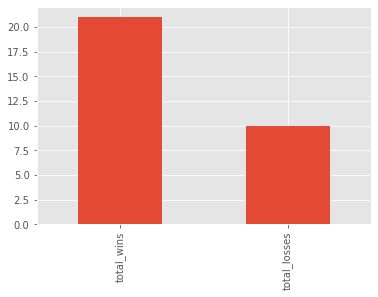

In [96]:
arsenal.plot.bar()

### Visualization function

Now I'm making a final df to work with, where we will have the index be the unique team names while retaining the `Team` column as well.

In [97]:
wlgr = wlg_rain_df.copy()
wlgr['unique_team'] = wlgr['Team']
wlgr.head()

,Team,total_wins,total_losses,total_goals,rain_wins,rain_wins_percent,unique_team
0,Aachen,6,15.0,19.0,3.0,50.0,Aachen
1,Arsenal,21,10.0,68.0,8.0,38.0,Arsenal
2,Aston Villa,7,14.0,24.0,2.0,29.0,Aston Villa
3,Augsburg,8,12.0,21.0,0.0,0.0,Augsburg
4,Bayern Munich,23,7.0,76.0,8.0,35.0,Bayern Munich


In [98]:
wlgr.set_index('unique_team', inplace=True)
wlgr.head()

,Team,total_wins,total_losses,total_goals,rain_wins,rain_wins_percent
unique_team,,,,,,
Aachen,Aachen,6,15.0,19.0,3.0,50.0
Arsenal,Arsenal,21,10.0,68.0,8.0,38.0
Aston Villa,Aston Villa,7,14.0,24.0,2.0,29.0
Augsburg,Augsburg,8,12.0,21.0,0.0,0.0
Bayern Munich,Bayern Munich,23,7.0,76.0,8.0,35.0


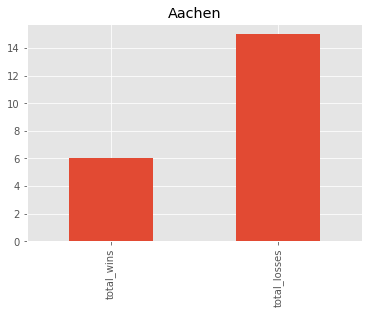

In [111]:
def get_plot(team, show_viz=False):
    if team in all_teams:
        x = wlgr.loc[team, 'total_wins':'total_losses']
        x.plot.bar()
       # viz = x.plot.bar()
        plt.title(team)
    
    if show_viz:
        plt.show
    
  #  return viz

get_plot('Aachen')

# Document Store - MongoDB

## MongoDB Handler

In [151]:
import pymongo

class MongodbHandler(object):
    
    def __init__(self):
        self.myclient = pymongo.MongoClient("mongodb://127.0.0.1:27017")
        self.mydb = self.myclient['section_16_lab_db']
        self.collection = self.mydb['section_16_lab_collection']
    
    def format_data(self, team_name, goals_2011, wins_2011, losses_2011, visual, rain_win_percent):
        data = {"team_name": team_name,
               "goals_2011": goals_2011,
               "wins_2011": wins_2011,
               "losses_2011": losses_2011,
               "win_loss_bar": visual,
               "rain_wins_percent": rain_wins_percent}
        
        return data
    
    def insert_record(self, record):
        
        return self.collection.insert_one(data)
    
    def find(mydb):
        [p for p in mydb.find({})]

In [137]:
wlgr.columns

Index(['Team', 'total_wins', 'total_losses', 'total_goals', 'rain_wins',
       'rain_wins_percent'],
      dtype='object')

In [138]:
wlgr_dict = wlgr.to_dict('index')

In [139]:
type(wlgr_dict)

dict

In [140]:
wlgr_dict

{'Aachen': {'Team': 'Aachen',
  'total_wins': 6,
  'total_losses': 15.0,
  'total_goals': 19.0,
  'rain_wins': 3.0,
  'rain_wins_percent': 50.0},
 'Arsenal': {'Team': 'Arsenal',
  'total_wins': 21,
  'total_losses': 10.0,
  'total_goals': 68.0,
  'rain_wins': 8.0,
  'rain_wins_percent': 38.0},
 'Aston Villa': {'Team': 'Aston Villa',
  'total_wins': 7,
  'total_losses': 14.0,
  'total_goals': 24.0,
  'rain_wins': 2.0,
  'rain_wins_percent': 29.0},
 'Augsburg': {'Team': 'Augsburg',
  'total_wins': 8,
  'total_losses': 12.0,
  'total_goals': 21.0,
  'rain_wins': 0.0,
  'rain_wins_percent': 0.0},
 'Bayern Munich': {'Team': 'Bayern Munich',
  'total_wins': 23,
  'total_losses': 7.0,
  'total_goals': 76.0,
  'rain_wins': 8.0,
  'rain_wins_percent': 35.0},
 'Blackburn': {'Team': 'Blackburn',
  'total_wins': 8,
  'total_losses': 23.0,
  'total_goals': 37.0,
  'rain_wins': 0.0,
  'rain_wins_percent': 0.0},
 'Bochum': {'Team': 'Bochum',
  'total_wins': 10,
  'total_losses': 17.0,
  'total_goals'

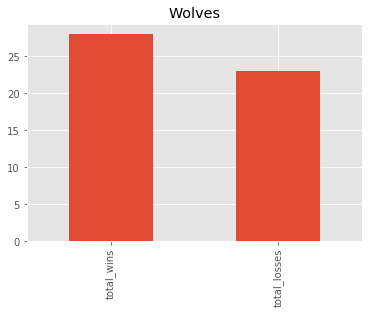

In [141]:
mydb = MongodbHandler()

for team, data in wlgr_dict.items():
    if data['rain_wins'] == 0:
        rain_wins_percent = 'N/A'
    else:
        rain_wins_percent = str(data['total_wins'] / data['rain_wins'])
    
    visual = get_plot(team)
    
    record = mydb.format_data(team, data['total_goals'], data['total_wins'], 
                            data['total_losses'], visual, 'rain_wins_percent')
    mydb.insert_record(record)
    del(visual)

# Summary

In this lab, we dug deep and used everything we've learned so far about python programming, databases, HTTP requests and API calls to ETL data from a SQL database into a MongoDB instance!